### INF2178 Final Project Group41 Code
### Ashley Wang(#1004114111)
### Yasmin Sawan (#1004500505)


## Data Cleaning

In [ ]:
import pandas as pd
import numpy as np

# import data
link = "https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv"
ds = pd.read_csv(link, header=0)
ds.columns

Index(['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID', 'PersonID',
       'Perceived_Race', 'Sex', 'Age_group__at_arrest_',
       'Youth_at_arrest__under_18_years', 'ArrestLocDiv', 'StripSearch',
       'Booked', 'Occurrence_Category', 'Actions_at_arrest___Concealed_i',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury',
       'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
       'SearchReason_PossessEvidence', 'ItemsFound', 'ObjectId'],
      dtype='object')

In [ ]:

# count numbers of strip search, cause injury, assist ecspe, possess weeapons, possess evidence 
ArrestCount = ds.groupby('PersonID', as_index = False).size()
StripSearchCount = ds.groupby('PersonID',as_index=False)['StripSearch'].sum()
CauseInjury = ds.groupby('PersonID', as_index=False)['SearchReason_CauseInjury'].sum()
AssistEscape = ds.groupby('PersonID', as_index=False)['SearchReason_AssistEscape'].sum()
PossessWeapons = ds.groupby('PersonID', as_index=False)['SearchReason_PossessWeapons'].sum()
PossessEvidence = ds.groupby('PersonID', as_index=False)['SearchReason_PossessEvidence'].sum()

# drop dupplicated rows
valid_dataset = ds.drop_duplicates(subset=['PersonID']).sort_values(by='PersonID')

# append strip search, cause injury, assist ecspe, possess weeapons, possess evidence to the new dataset
valid_dataset['ArrestCount'] = ArrestCount['size'].to_list()
valid_dataset['StripSearchCount'] = StripSearchCount['StripSearch'].to_list()
valid_dataset['CauseInjury'] = CauseInjury['SearchReason_CauseInjury'].to_list()
valid_dataset['AssistEscape'] = AssistEscape['SearchReason_AssistEscape'].to_list()
valid_dataset['PossessWeapons'] = PossessWeapons['SearchReason_PossessWeapons'].to_list()
valid_dataset['PossessEvidence'] = PossessEvidence['SearchReason_PossessEvidence'].to_list()
#valid_dataset['SearchReasonCount'] = valid_dataset[['CauseInjury', 'AssistEscape', 'PossessWeapons', 'PossessEvidence']].sum(axis=1)
valid_dataset['StripSearched'] = valid_dataset['StripSearchCount']

# drop all useless columns
valid_dataset = valid_dataset.drop(columns = ['Arrest_Year', 'Arrest_Month', 'EventID', 
        'ArrestID','ArrestLocDiv', 'StripSearch', 'Age_group__at_arrest_',
       'Booked','Actions_at_arrest___Concealed_i','Youth_at_arrest__under_18_years',
       'Actions_at_arrest___Combative__', 'Actions_at_arrest___Resisted__d',
       'Actions_at_arrest___Mental_inst', 'Actions_at_arrest___Assaulted_o',
       'Actions_at_arrest___Cooperative', 'SearchReason_CauseInjury',
       'SearchReason_AssistEscape', 'SearchReason_PossessWeapons',
       'SearchReason_PossessEvidence', 'Occurrence_Category',  'ItemsFound', 'ObjectId']) 

# drop nan values
valid_dataset = valid_dataset.dropna()
value_to_drop = 'U'
valid_dataset = valid_dataset[valid_dataset['Sex'] != value_to_drop]
valid_dataset['StripSearched'] = valid_dataset['StripSearched'].apply(lambda x: 1 if x > 1 else x)
valid_dataset['CauseInjury'] = valid_dataset['CauseInjury'].apply(lambda x: 1 if x > 1 else x)
valid_dataset['AssistEscape'] = valid_dataset['AssistEscape'].apply(lambda x: 1 if x > 1 else x)
valid_dataset['PossessWeapons'] = valid_dataset['PossessWeapons'].apply(lambda x: 1 if x > 1 else x)
valid_dataset['PossessEvidence'] = valid_dataset['PossessEvidence'].apply(lambda x: 1 if x > 1 else x)
# display dataset
valid_dataset.head()




,PersonID,Perceived_Race,Sex,ArrestCount,StripSearchCount,CauseInjury,AssistEscape,PossessWeapons,PossessEvidence,StripSearched
16372,300000,East/Southeast Asian,M,1,0,0.0,0.0,0.0,0.0,0
38252,300001,White,F,1,0,0.0,0.0,0.0,0.0,0
55323,300002,White,M,1,0,0.0,0.0,0.0,0.0,0
55640,300003,White,M,8,1,1.0,0.0,1.0,0.0,1
57744,300004,Black,M,1,0,0.0,0.0,0.0,0.0,0


## EDA


In [ ]:

# Measures of central tendency & variability of DV(StripSearchCount)

# dependent variable
dv = valid_dataset['StripSearchCount']

# sample size
n = len(dv)

# mean of dependent variable
dv_mean = np.mean(dv)

# median of dependent variable
dv_median = np.median(dv)

# mode of dependent variable
dv_mode = np.average(dv)

# standard deviation of dependent variable
dv_std = np.std(dv, ddof=1)

# standard error of the mean of dependent variable
dv_sem = dv_std/np.square(n)

# variance of dependent variable
dv_var = dv.var()

# print
print(f"""
Dependent variable(StripSearchCount) 
central tendency & meausre of variability:
  sample size = {n},
  mean = {dv_mean:.2f},
  median = {dv_median:.2f},
  mode = {dv_mode:.2f},
  standard deviation = {dv_std:.2f},
  standard error of mean = {dv_sem:.2f},
  variance = {dv_var:.2f}""")



Dependent variable(StripSearchCount) 
central tendency & meausre of variability:
  sample size = 37339,
  mean = 0.21,
  median = 0.00,
  mode = 0.21,
  standard deviation = 0.69,
  standard error of mean = 0.00,
  variance = 0.48


In [ ]:
# Frequency distribution & sample mean of IDV(sex)

# Mean of independent variable(sex) to distict gender ground
f_mean = np.mean(valid_dataset[valid_dataset['Sex']=='F']['StripSearchCount'])
m_mean = np.mean(valid_dataset[valid_dataset['Sex']=='M']['StripSearchCount'])

# Frequency of independent variable(sex)
f_freq = len(valid_dataset[valid_dataset['Sex']=="F"])
m_freq = len(valid_dataset[valid_dataset['Sex']=="M"])

print(f"""
Male mean = {m_mean:.2f}
Female mean = {f_mean:.2f}
Male frequency = {m_freq:.2f}
Female frequency = {f_freq:.2f}
""")


Male mean = 0.22
Female mean = 0.17
Male frequency = 29664.00
Female frequency = 7675.00



In [ ]:
# Frequency distribution of IDV(Perceived_Race)
race_freq = valid_dataset['Perceived_Race'].value_counts()
print(race_freq)

White                   14513
Black                    9933
Unknown or Legacy        3537
East/Southeast Asian     3102
South Asian              2463
Middle-Eastern           2030
Latino                   1095
Indigenous                666
Name: Perceived_Race, dtype: int64


In [ ]:

# Frequency distribution of IDV('CauseInjury', 'AssistEscape', 'PossessWeapons', 'PossessEvidence')
ci_freq = valid_dataset['CauseInjury'].value_counts()
ae_freq = valid_dataset['AssistEscape'].value_counts()
pw_freq = valid_dataset['PossessWeapons'].value_counts()
pe_freq = valid_dataset['PossessEvidence'].value_counts()
print(f"""
CauseInjury Frequency: 
{ci_freq}
AssistEscape Frequency: 
{ae_freq} 
PossessWeapons Frequency: 
{pw_freq}
PossessEvidence Frequency: 
{pe_freq}   
""")


CauseInjury Frequency: 
0.0    33228
1.0     4111
Name: CauseInjury, dtype: int64
AssistEscape Frequency: 
0.0    35211
1.0     2128
Name: AssistEscape, dtype: int64 
PossessWeapons Frequency: 
0.0    34612
1.0     2727
Name: PossessWeapons, dtype: int64
PossessEvidence Frequency: 
0.0    34742
1.0     2597
Name: PossessEvidence, dtype: int64   



In [ ]:
# Measures of central tendency & variability of IDVs(CauseInjury, AssistEscape, PossessWeapons, PossessEvidence)

# independent variables
idv_ci = valid_dataset['CauseInjury']
idv_ae = valid_dataset['AssistEscape']
idv_pw = valid_dataset['PossessWeapons']
idv_pe = valid_dataset['PossessEvidence']

# sample size
n = len(idv_ci)

# mean of independent variables
ci_mean = np.mean(idv_ci)
ae_mean = np.mean(idv_ae)
pw_mean = np.mean(idv_pw)
pe_mean = np.mean(idv_pe)

# median of independent variables
ci_median = np.median(idv_ci)
ae_median = np.median(idv_ae)
pw_median = np.median(idv_pw)
pe_median = np.median(idv_pe)

# mode of independent variables
ci_mode = np.average(idv_ci)
ae_mode = np.average(idv_ae)
pw_mode = np.average(idv_pw)
pe_mode = np.average(idv_pe)

# standard deviation of independent variables
ci_std = np.std(idv_ci, ddof=1)
ae_std = np.std(idv_ae, ddof=1)
pw_std = np.std(idv_pw, ddof=1)
pe_std = np.std(idv_pe, ddof=1)

# variance of independent variables
ci_var = idv_ci.var()
ae_var = idv_ae.var()
pw_var = idv_pw.var()
pe_var = idv_pe.var()

# print
print(f"""
Independent variable(CauseInjury) 
central tendency & meausre of variability:
  sample size = {n},
  mean = {ci_mean:.2f},
  median = {ci_median:.2f},
  mode = {ci_mode:.2f},
  standard deviation = {ci_std:.2f},
  variance = {ci_var:.2f}""")

print(f"""
Independent variable(AssistEscape) 
central tendency & meausre of variability:
  sample size = {n},
  mean = {ae_mean:.2f},
  median = {ae_median:.2f},
  mode = {ae_mode:.2f},
  standard deviation = {ae_std:.2f},
  variance = {ae_var:.2f}""")

print(f"""
Independent variable(PossessWeapons) 
central tendency & meausre of variability:
  sample size = {n},
  mean = {pw_mean:.2f},
  median = {pw_median:.2f},
  mode = {pw_mode:.2f},
  standard deviation = {pw_std:.2f},
  variance = {pw_var:.2f}""")

print(f"""
Independent variable(PossessEvidence) 
central tendency & meausre of variability:
  sample size = {n},
  mean = {pe_mean:.2f},
  median = {pe_median:.2f},
  mode = {pe_mode:.2f},
  standard deviation = {pe_std:.2f},
  variance = {pe_var:.2f}""")


Independent variable(CauseInjury) 
central tendency & meausre of variability:
  sample size = 37339,
  mean = 0.11,
  median = 0.00,
  mode = 0.11,
  standard deviation = 0.31,
  variance = 0.10

Independent variable(AssistEscape) 
central tendency & meausre of variability:
  sample size = 37339,
  mean = 0.06,
  median = 0.00,
  mode = 0.06,
  standard deviation = 0.23,
  variance = 0.05

Independent variable(PossessWeapons) 
central tendency & meausre of variability:
  sample size = 37339,
  mean = 0.07,
  median = 0.00,
  mode = 0.07,
  standard deviation = 0.26,
  variance = 0.07

Independent variable(PossessEvidence) 
central tendency & meausre of variability:
  sample size = 37339,
  mean = 0.07,
  median = 0.00,
  mode = 0.07,
  standard deviation = 0.25,
  variance = 0.06


In [ ]:
import plotly.express as px
fig = px.histogram(valid_dataset, x="Sex", y="StripSearchCount",height=800)
fig.show()

In [ ]:

fig = px.histogram(valid_dataset, x="Perceived_Race",
             color='StripSearched', barmode='group',
             height=800, title = 'Strip Searched vs Race')
fig.show()

In [ ]:
fig = px.histogram(valid_dataset, x="Sex",
             color='StripSearched', barmode='group',
             height=800, title = 'Strip Searched vs Sex')
fig.show()

In [ ]:

pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import researchpy as rp

summary, results = rp.ttest(group1= valid_dataset['StripSearchCount'][valid_dataset['Sex'] == 'M'], group1_name= "Male",
                            group2= valid_dataset['StripSearchCount'][valid_dataset['Sex'] == 'F'], group2_name= "Female")
print(summary)
print(results)

# Import stats packages for ttest
import scipy.stats as stats

# Seperate the gender groups for ttest 
male_group = valid_dataset['StripSearchCount'][valid_dataset['Sex'] == 'M']
female_group = valid_dataset['StripSearchCount'][valid_dataset['Sex'] == 'F']

# t-test
ttest_statistic, ttest_pvalue = stats.ttest_ind(male_group, female_group)

print(f'T-Test: s = {ttest_statistic}, p = {ttest_pvalue}')


   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      Male  29664.0  0.219761  0.709032  0.004117   0.211692  0.227830
1    Female   7675.0  0.166906  0.616766  0.007040   0.153105  0.180706
2  combined  37339.0  0.208897  0.691396  0.003578   0.201884  0.215910
              Independent t-test     results
0  Difference (Male - Female) =       0.0529
1          Degrees of freedom =   37337.0000
2                           t =       5.9723
3       Two side test p value =       0.0000
4      Difference < 0 p value =       1.0000
5      Difference > 0 p value =       0.0000
6                   Cohen's d =       0.0765
7                   Hedge's g =       0.0765
8              Glass's delta1 =       0.0745
9            Point-Biserial r =       0.0309
T-Test: s = 5.972280401823296, p = 2.360715592376732e-09


/usr/local/lib/python3.9/dist-packages/researchpy/ttest.py:38: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Power Analysis

In [ ]:

# Import required modules
from math import sqrt
from statsmodels.stats.power import TTestIndPower

#Calculate of effect size
# size of samples in the study
n1, n2 = len(valid_dataset[valid_dataset['Sex']=='M']), len(valid_dataset[valid_dataset['Sex']=='F'])

# variance of samples in the study
s1, s2 = valid_dataset[valid_dataset['Sex']=='M']['StripSearchCount'].var(), valid_dataset[valid_dataset['Sex']=='F']['StripSearchCount'].var()

# Calculate the pooled standard deviation
# (Cohen's d)
s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))

# means of the samples
u1, u2 = np.mean(valid_dataset[valid_dataset['Sex']=='M']['StripSearchCount']), np.mean(valid_dataset[valid_dataset['Sex']=='F']['StripSearchCount'])

# Calculate the effect size
# calculate the effect size
d = (u1 - u2) / s
print(f'Effect size: {d}')

# factors for power analysis
alpha = 0.05
power = 0.8
  
# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')
  
print('Sample size/Number needed in each group: {:.3f}'.format(n))

# Initiate the power analysis
power_analysis = TTestIndPower()
# Calculate power
alpha = power_analysis.solve_power(effect_size = d, power = 0.8, nobs1 = 393, ratio = 1, alternative = 'two-sided')
# Print results
print('The significance level for the hypothesis testing is', round(alpha, 2))

Effect size: 0.0764834523129048
Sample size/Number needed in each group: 2684.461
The significance level for the hypothesis testing is 0.66


/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning:

invalid value encountered in _nct_sf

/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning:

invalid value encountered in _nct_cdf



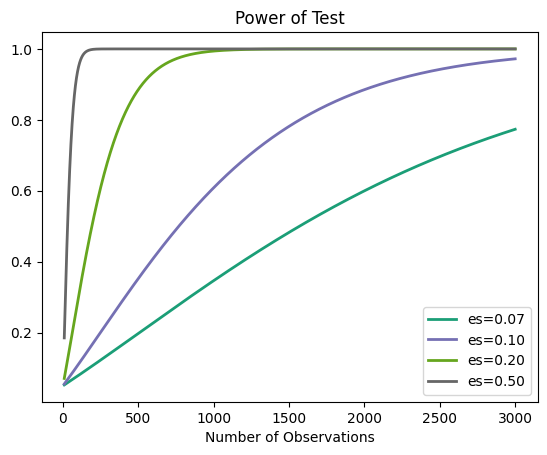

In [ ]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
  
  
# power analysis varying parameters
effect_sizes = np.array([0.07, 0.1, 0.2,0.5])
sample_sizes = np.array(range(10, 3000))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

## ANCOVA Test

In [ ]:
pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=db337aefb73337326a2e98b2524229c317dcee7d662ee58a67b7c4eb1688026e
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [ ]:

from pingouin import ancova
ancova(data=valid_dataset, dv='StripSearchCount', covar=['ArrestCount','CauseInjury', 'AssistEscape', 'PossessWeapons', 'PossessEvidence'], between='Sex')

,Source,SS,DF,F,p-unc,np2
0,Sex,0.167373,1,1.216457,2.700642e-01,0.000033
1,ArrestCount,2155.733884,1,15667.700448,0.000000e+00,0.295619
2,CauseInjury,763.375232,1,5548.149776,0.000000e+00,0.129387
3,AssistEscape,25.467808,1,185.097979,4.707542e-42,0.004934
4,PossessWeapons,105.881086,1,769.535218,1.146039e-167,0.020197
5,PossessEvidence,292.210168,1,2123.759991,0.000000e+00,0.053826
6,Residual,5136.545573,37332,NaN,NaN,NaN


## Logistic Regression

In [ ]:

#building the model with statsmodels
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import train_test_split

valid_dataset2 = valid_dataset
x = valid_dataset2[['Sex','Perceived_Race','CauseInjury', 'AssistEscape', 'PossessWeapons', 'PossessEvidence']]
y = valid_dataset2['StripSearched']  
x_train, x_test, y_train, y_test = train_test_split(
    x, y,test_size = 0.2, random_state=123)

# Put the training predictors and responses into one DataFrame to be input into the model

trainingdata = pd.concat([x_train,y_train], axis = 1)

# Build the model
log_reg_1 = smf.logit('StripSearched ~ Sex+Perceived_Race+CauseInjury+AssistEscape+PossessWeapons+PossessEvidence', data=trainingdata).fit()


log_reg_1.summary()



         Current function value: 0.052279
         Iterations: 35


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          StripSearched   No. Observations:                29871
Model:                          Logit   Df Residuals:                    29858
Method:                           MLE   Df Model:                           12
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.8680
Time:                        01:53:02   Log-Likelihood:                -1561.6
converged:                      False   LL-Null:                       -11834.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.6195      0.171    -26.956      0.000      -4.955      -4.284
Sex[T.M]                                   0.4462      0.159      2.809      0.005       0.135       0.758
Perceived_Race[T.East/Southeast Asian]    -0.7112      0.270     -2.634      0.008      -1.240      -0.182
Perceived_Race[T.Indigenous]               0.1145      0.423      0.270      0.787      -0.715       0.944
Perceived_Race[T.Latino]                   1.1062      0.203      5.438      0.000       0.708       1.505
Perceived_Race[T.Middle-Eastern]          -0.8859      0.346     -2.564      0.010      -1.563      -0.209
Perceived_Race[T.South Asian]             -0.7544      0.304     -2.480      0.013      -1.351      -0.158
Perceived_Race[T.Unknown or Legacy]       -0.6299      0.251     -2.511      0.012      -1.122      -0.138
Perceived_Race[T.White]                   -0.1110      0.137     -0.807      0.419      -0.381       0.158
CauseInjury                               10.9592      1.062     10.315      0.000       8.877      13.042
AssistEscape                              26.0573   1.58e+04      0.002      0.999   -3.09e+04     3.1e+04
PossessWeapons                            26.9482   7517.236      0.004      0.997   -1.47e+04    1.48e+04
PossessEvidence                           28.8252   1.27e+04      0.002      0.998   -2.48e+04    2.49e+04
==========================================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:


from sklearn.metrics import accuracy_score

y_pred = log_reg_1.predict(x_test)
ypred = list(map(round, y_pred))

print('Accuracy = {:.5f}'.format(accuracy_score(y_test, ypred)))


Accuracy = 0.99089



Confusion Matrix : 
 [[6462    0]
 [  68  938]]


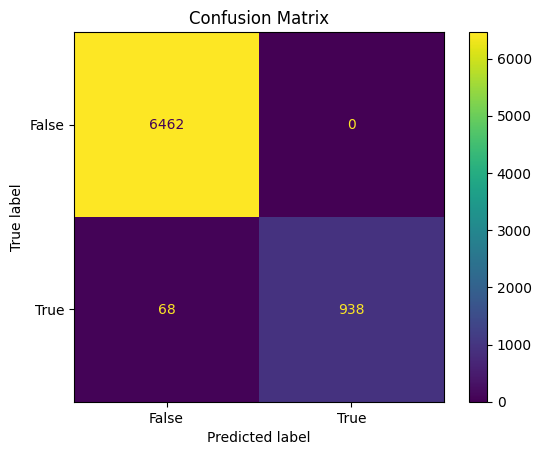

In [ ]:


import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, ypred) 
print ("\nConfusion Matrix : \n", cm) 


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.title('Confusion Matrix')
plt.show()